In [2]:
# Prepare

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
gazepoint = pd.read_csv('gazepoint.csv', header = None)
gazepoint_invalid = pd.read_csv('gazepoint_invalid.csv', header = None)
emg = pd.read_csv('emg.csv', header = None)
vts = pd.read_csv('vts.csv', header = None)
grasp = pd.read_csv('grasp.csv', header = None)
mp4videoidx = pd.read_csv('mp4videoidx.csv', header = None)

In [5]:
vts.shape

(7748672, 1)

In [6]:
for testNumber in tqdm(range(vts.size)):
    if vts[0][testNumber] > 161.78 + 60:
        break
testNumber

113567

In [7]:
testGrasp = grasp.head(testNumber)
testGazepoint = gazepoint.head(testNumber)
testVts = vts.head(testNumber)

In [8]:
testVts.shape

(113567, 1)

In [9]:
# Find the first grasp period (including relax: relax first and then grasp)

In [10]:
# find the first grasp period start point (relax start point)
for num in range(testGrasp.index[0],testGrasp.size):
    if grasp[0][num] == 0:
        break
num
firstGraspStart = num
firstGraspStart

14185

In [11]:
firstGrasp = testGrasp.tail(-num)
# firstGrasp.reset_index(inplace = True, drop = True)
firstGrasp

,0
14185,0
14186,0
14187,0
14188,0
14189,0
...,...
113562,0
113563,0
113564,0
113565,0


In [12]:
# find the grasp action start point
for num in range(firstGrasp.index[0], firstGrasp.index[-1]):
    if firstGrasp[0][num] != 0:
        break
graspStartPosition = num
graspStartPosition

19123

In [13]:
firstGraspActionStart = testGrasp.tail(-graspStartPosition)
# firstGraspActionStart.reset_index(inplace = True, drop = True)
firstGraspActionStart

,0
19123,1
19124,1
19125,1
19126,1
19127,1
...,...
113562,0
113563,0
113564,0
113565,0


In [14]:
# find the grasp action end point
for num in range(firstGraspActionStart.index[0], firstGraspActionStart.index[-1]):
    if firstGraspActionStart[0][num] == 0:
        break
firstGraspEnd = num - 1
firstGraspEnd

32787

In [15]:
firstGraspPeriod = testGrasp.iloc[firstGraspStart:firstGraspEnd+1, :]
firstGraspPeriod

,0
14185,0
14186,0
14187,0
14188,0
14189,0
...,...
32783,1
32784,1
32785,1
32786,1


In [16]:
# Find the Second grasp period (including relax: relax first and then grasp)

In [17]:
# find the second grasp period start point (relax start point)
secondGraspStart = firstGraspEnd + 1
secondGrasp = testGrasp.tail(-secondGraspStart)
# secondGrasp.reset_index(inplace = True, drop = True)
secondGrasp

,0
32788,0
32789,0
32790,0
32791,0
32792,0
...,...
113562,0
113563,0
113564,0
113565,0


In [18]:
# Find the fixation

In [19]:
from PyTrack.Experiment import Experiment
from PyTrack.etDataReader import fixation_detection

ModuleNotFoundError: No module named 'PyTrack'

In [ ]:
# parepare the data
# first grasp period
gaze = testGazepoint.iloc[firstGraspStart:firstGraspEnd+1, :]
timeStamps = testVts.iloc[firstGraspStart:firstGraspEnd+1, :]

x = gaze[0].to_numpy()*1920
y = gaze[1].to_numpy()*1080
time = gaze.index.to_numpy()
# time = timeStamps[0].to_numpy()
time

In [ ]:
# perform finding the fixations -- first grasp period
fixation = fixation_detection(x, y, time, missing = 0.0, maxdist = 25, mindur = 200)
fixation[1]

In [ ]:
fixation[1][0][0]

In [ ]:
# get the fixation period and put it in xx and yy in order to plot
for i in fixation[1]:
    xx = []
    yy = []
    for j in range(i[0], i[1]):
        xx.append(j), yy.append(0.95)
        ax.plot(xx, yy)

In [ ]:
# test grasp period
testX = testGazepoint[0].to_numpy()*1920
testY = testGazepoint[1].to_numpy()*1080
testTime = testGazepoint.index.to_numpy()

In [ ]:
# perform finding the fixations -- test grasp period
testFixation = fixation_detection(testX, testY, testTime, missing = 0.0, maxdist = 25, mindur = 200)
testFixation[1]

In [20]:
testGrasp

,0
0,1
1,1
2,1
3,1
4,1
...,...
113562,0
113563,0
113564,0
113565,0


  0%|          | 0/129 [00:00<?, ?it/s]

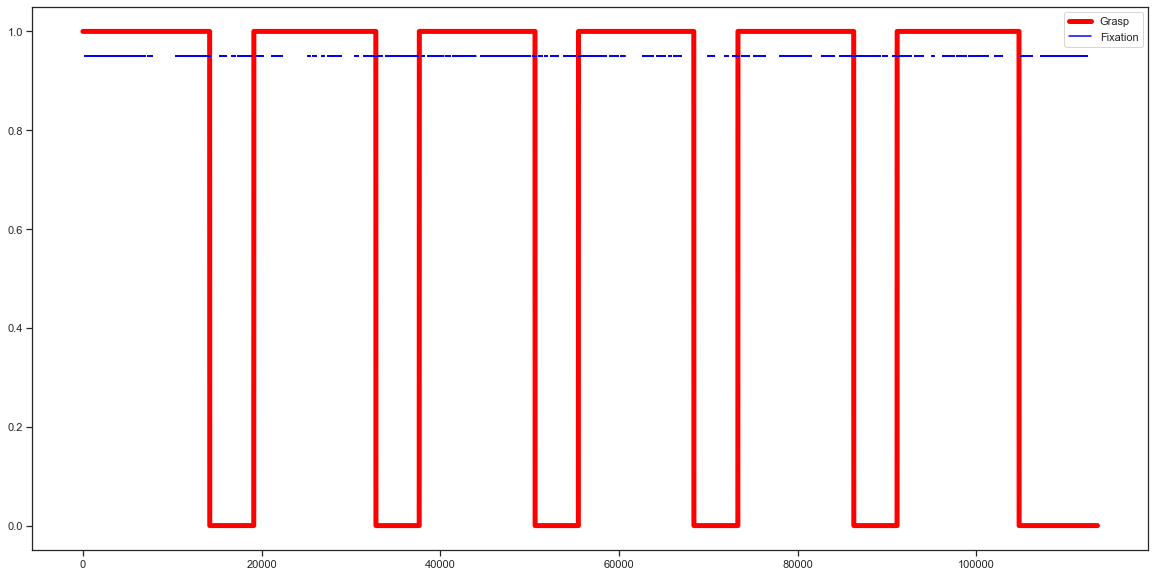

In [491]:
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testGrasp, linewidth=5, color = 'red')
for i in tqdm(testFixation[1]):
    xx = []
    yy = []
    for j in range(i[0], i[1]):
        xx.append(j), yy.append(0.95)
        line2, = ax.plot(xx, yy, color = 'blue')
line1.set_label('Grasp')
line2.set_label('Fixation')
ax.legend()
plt.show()

In [366]:
vts[0][32787]

178.81

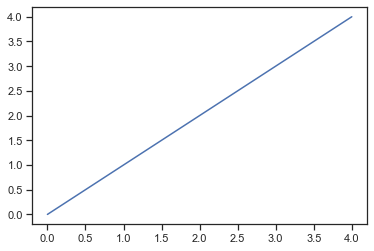

In [486]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
l,=ax.plot(range(5))
l.set_label('line 1')
ax.legend()
plt.show()